In [123]:
!pip install Sastrawi

In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import re
import seaborn as sns

In [125]:
df=pd.read_csv('ikn.csv')
df

,Unnamed: 0.1,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Unnamed: 0,image_url,in_reply_to_screen_name,location
0,0,Sun Mar 17 06:38:07 +0000 2024,"1,76925E+18",INFO Star Safety Bersama Universitas Insan Bud...,0,0,0,0,in,"1,70346E+18","1,76925E+18",BppnIkn37632,https://twitter.com/BppnIkn37632/status/176925...,NaN,NaN,NaN,NaN
1,1,Sun Mar 17 06:37:51 +0000 2024,"1,76925E+18",INFO Star Safety Bersama Universitas Insan Bud...,0,0,0,0,in,"1,70346E+18","1,76925E+18",BppnIkn37632,https://twitter.com/BppnIkn37632/status/176925...,NaN,NaN,NaN,NaN
2,2,Sun Mar 17 06:37:40 +0000 2024,"1,76925E+18",INFO Star Safety Bersama Universitas Insan Bud...,0,0,0,0,in,"1,70346E+18","1,76925E+18",BppnIkn37632,https://twitter.com/BppnIkn37632/status/176925...,NaN,NaN,NaN,NaN
3,3,Sun Mar 17 02:18:39 +0000 2024,"1,76919E+18",@pro_gibran_ Semoga program yang di bawa akan ...,0,0,0,0,in,"1,71979E+18","1,76889E+18",ikn_merdeka,https://twitter.com/ikn_merdeka/status/1769186...,NaN,NaN,NaN,NaN
4,4,Sat Mar 16 17:13:23 +0000 2024,"1,76905E+18","@MurtadhaOne1 IKN adalah Program Penjajah, dan...",0,0,0,0,in,"1,56371E+18","1,76881E+18",RadenAjeng_Ei,https://twitter.com/RadenAjeng_Ei/status/17690...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1012,Mon Mar 25 12:18:22 +0000 2024,1772236581782593823,@just2yeon @tubirfess Tapi sih ... Ada isu yan...,0,0,0,0,in,1453509288782024710,1771899663396094432,TrifanyKim96,https://x.com/TrifanyKim96/status/177223658178...,303.0,NaN,just2yeon,NaN
1013,1013,Mon Mar 25 09:57:10 +0000 2024,1772201047345578382,@RafsAkbar Tbf gw kontra semua program diatas....,0,1,0,6,in,1512071354832814085,1772181990063644957,ServiceAperture,https://x.com/ServiceAperture/status/177220104...,304.0,NaN,RafsAkbar,NaN
1014,1014,Mon Mar 25 08:58:47 +0000 2024,1772186356178948216,@DedynurPalakka @psi_id 6. Program makan grati...,0,0,0,2,in,1435725971798192128,1772154856620576983,SIJORIII,https://x.com/SIJORIII/status/1772186356178948216,305.0,NaN,DedynurPalakka,Singapore
1015,1015,Mon Mar 25 08:57:56 +0000 2024,1772186140243792097,Wujudkan Ketahanan Pangan IKN Program Petani M...,0,0,1,1,in,1715187619762712576,1772186140243792097,neysaalshara,https://x.com/neysaalshara/status/177218614024...,306.0,https://pbs.twimg.com/media/GJgR3aTb0AAtKq-.jpg,NaN,NaN


1.Cleaning Data

In [126]:
df.shape

(1017, 17)

In [127]:
df.isnull().sum()

,0
Unnamed: 0.1,0
created_at,0
id_str,0
full_text,0
quote_count,0
reply_count,0
retweet_count,0
favorite_count,0
lang,0
user_id_str,0


In [128]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1012,False
1013,False
1014,False
1015,False


In [129]:
df=df['full_text']
df

,full_text
0,INFO Star Safety Bersama Universitas Insan Bud...
1,INFO Star Safety Bersama Universitas Insan Bud...
2,INFO Star Safety Bersama Universitas Insan Bud...
3,@pro_gibran_ Semoga program yang di bawa akan ...
4,"@MurtadhaOne1 IKN adalah Program Penjajah, dan..."
...,...
1012,@just2yeon @tubirfess Tapi sih ... Ada isu yan...
1013,@RafsAkbar Tbf gw kontra semua program diatas....
1014,@DedynurPalakka @psi_id 6. Program makan grati...
1015,Wujudkan Ketahanan Pangan IKN Program Petani M...


In [130]:
df=df.to_frame()
df=df.rename(columns={'full_text':'content'})
df

,content
0,INFO Star Safety Bersama Universitas Insan Bud...
1,INFO Star Safety Bersama Universitas Insan Bud...
2,INFO Star Safety Bersama Universitas Insan Bud...
3,@pro_gibran_ Semoga program yang di bawa akan ...
4,"@MurtadhaOne1 IKN adalah Program Penjajah, dan..."
...,...
1012,@just2yeon @tubirfess Tapi sih ... Ada isu yan...
1013,@RafsAkbar Tbf gw kontra semua program diatas....
1014,@DedynurPalakka @psi_id 6. Program makan grati...
1015,Wujudkan Ketahanan Pangan IKN Program Petani M...


2.Preprocessing Data

In [131]:
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)            # Menghapus mention (dimulai dengan '@')
    text = re.sub(r'#\w+', '', text)            # Menghapus hashtag (dimulai dengan '#')
    text = re.sub(r'RT[\s]+', '', text)         # Menghapus retweet ('RT ')
    text = re.sub(r'https?://\S+', '', text)    # Menghapus link (URL)
    text = re.sub(r'[^\w\s]', '', text)         # Menghapus karakter khusus, kecuali huruf, angka, dan spasi
    text = re.sub(r'\s+', ' ', text).strip()    # Menghapus spasi ekstra di antara teks
    return text

# Terapkan fungsi clean_text ke kolom 'content'
df['content'] = df['content'].apply(lambda x: clean_text(x) if isinstance(x, str) else "")


In [132]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
factory=StopWordRemoverFactory()
stop_word_remover=factory.get_stop_words()

stem_factory=StemmerFactory()
stemmer=stem_factory.create_stemmer()

In [134]:
def transform(text):
  text=text.lower()

  # tokenisasi
  text=word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stop_word_remover and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  # stemming
  for i  in text:
    y.append(stemmer.stem(i))

  return " ".join(y)

In [135]:
df['content']=df['content'].apply(lambda x:transform(x))

3.Analisis Sentiment dengan PreTrained Model

In [136]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [137]:
sentiment=[]
scores=[]

In [151]:
sentiment = []  # Inisialisasi daftar kosong

for i in df['content']:
    results = nlp(i)  # Ambil hasil analisis
    # Iterasi melalui setiap hasil (walaupun biasanya hanya satu)
    for result in results:
        # Buat dictionary untuk menyimpan hasil
        temp_dict = {
            'content': i,
            'sentimen': result['label'],
            'score': result['score']
        }
        sentiment.append(temp_dict)

# Buat DataFrame baru dari daftar hasil
sentiment_df = pd.DataFrame(sentiment)

# Menggabungkan dengan DataFrame awal jika diperlukan
df = df.merge(sentiment_df, on='content', how='left')  # Atur merge sesuai kebutuhan

In [157]:
import pandas as pd

df= pd.DataFrame(sentiment)
df

,content,sentimen,score
0,info star safety sama universitas insan budi u...,neutral,0.998850
1,info star safety sama universitas insan budi u...,neutral,0.998850
2,info star safety sama universitas insan budi u...,neutral,0.998850
3,moga program bawa sangat bantu generasi muda i...,positive,0.994825
4,ikn program jajah tiap warga negara dukung ipk...,neutral,0.998537
...,...,...,...
1012,sih isu kata israel buka kantor dagang macam t...,neutral,0.998755
1013,tbf gw kontra semua program atas ikn sempet kr...,negative,0.827650
1014,6 program makan gratis 5 thn 7 jual kaving ikn,neutral,0.998363
1015,wujud tahan pangan ikn program tani milenial k...,neutral,0.998297


4.Visualization

In [158]:
cs=df['sentimen'].value_counts()
cs

,count
sentimen,
negative,503
neutral,305
positive,209


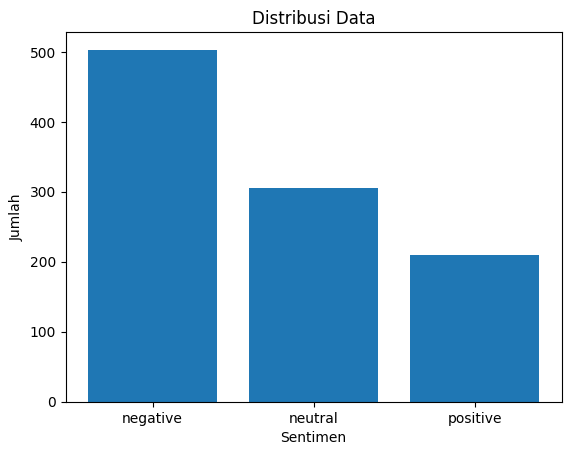

In [160]:
# sns.countplot(x='sentimen',data=df)
plt.bar(cs.index,cs.values)
plt.title('Distribusi Data')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [169]:
data_positif=df[df['sentimen']=='positive']
data_negatif=df[df['sentimen']=='negative']
data_netral=df[df['sentimen']=='neutral']
data_positif.head()

,content,sentimen,score
3,moga program bawa sangat bantu generasi muda i...,positive,0.994825
5,alhamdulillah mungkin krn prabowogibran komitm...,positive,0.998291
8,lah arti program nya pak anies cocok dong nger...,positive,0.987473
10,loh2 warga kalimantan timur kan dukung tinggi ...,positive,0.983243
13,menang bukti pesan program politik prabowogibr...,positive,0.968305


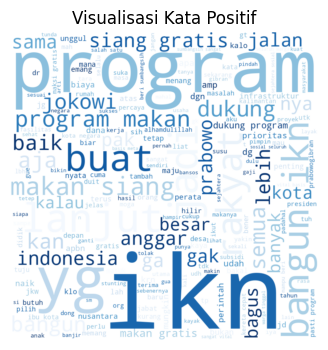

In [170]:
all_text_s1 = ' '.join(word for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

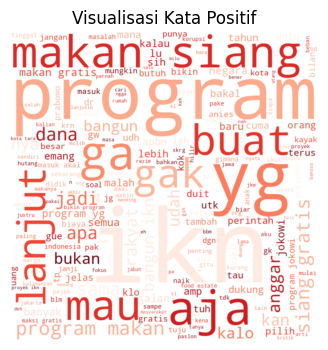

In [173]:
all_text_s2 = ' '.join(word for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s2)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

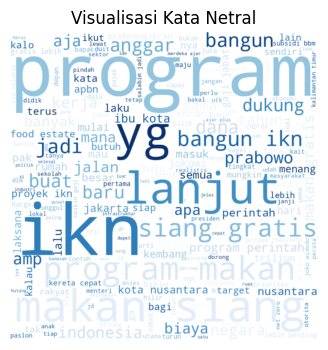

In [174]:
all_text_s3 = ' '.join(word for word in data_netral["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s3)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

5.MODEL BUILDING

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [182]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['sentimen']=encoder.fit_transform(df['sentimen'])
df

,content,sentimen,score
0,info star safety sama universitas insan budi u...,1,0.998850
1,info star safety sama universitas insan budi u...,1,0.998850
2,info star safety sama universitas insan budi u...,1,0.998850
3,moga program bawa sangat bantu generasi muda i...,2,0.994825
4,ikn program jajah tiap warga negara dukung ipk...,1,0.998537
...,...,...,...
1012,sih isu kata israel buka kantor dagang macam t...,1,0.998755
1013,tbf gw kontra semua program atas ikn sempet kr...,0,0.827650
1014,6 program makan gratis 5 thn 7 jual kaving ikn,1,0.998363
1015,wujud tahan pangan ikn program tani milenial k...,1,0.998297


In [183]:
X=df['content']
y=df['sentimen']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [185]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [186]:
y_pred=mnb.predict(X_test)
akurasi=accuracy_score(y_test,y_pred)
print(akurasi)

0.5637254901960784


In [187]:
cr=classification_report(y_test,y_pred)
print('\nReport:\n',cr)


Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        91
           1       0.86      0.29      0.44        65
           2       0.83      0.10      0.19        48

    accuracy                           0.56       204
   macro avg       0.74      0.47      0.43       204
weighted avg       0.70      0.56      0.49       204



In [190]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [191]:
y_pred=svm.predict(X_test)
akurasi=accuracy_score(y_test,y_pred)
print(akurasi)

0.6862745098039216


In [193]:
user=input('Input Text:')
user_transform=tfidf.transform([user])
predict=svm.predict(user_transform)
predict_inverse=encoder.inverse_transform(predict)
print(predict_inverse)

Input Text:gibran wapres yang bijak
['neutral']
